# ARIMA 2: MA, I, ARI, IMA, ARMA, ARIMA
- Revisão
- MA
- ARMA
- I do ARIMA
- ARI
- IMA
- ARIMA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.ar_model import AutoReg

def all_ac(Y):
    fig, ax = plt.subplots(1, 2, figsize=(16,5))
    plot_acf(Y, zero=False, ax=ax[0])
    plot_pacf(Y, zero=False, ax=ax[1])
    plt.show()

def plot_forecast(serie_original, previsao):
    plt.rcParams["figure.figsize"] = [12, 5]
    plt.plot(serie_original, label='Serie Histórica', linestyle='-')  
    plt.plot(previsao, label='Previsão', linestyle='--')  
    plt.xlabel('Data')
    plt.ylabel('Valores')
    plt.title('Serie histórica com previsão')
    plt.legend()
    plt.show()
    
def teste_estacionariedade(s):
    kps = kpss(s)
    adf = adfuller(s)
    
    kpss_pv, adf_pv = kps[1], adf[1]
    kpssh, adfh = 'Estacionário', 'Não Estacionário'
    
    if adf_pv < 0.05:
        adfh = 'Estacionário'
    if kpss_pv < 0.05:
        kpssh = 'Não Estacionário'
    return (kpssh, adfh)

### Retomando o exemplo da aula passada

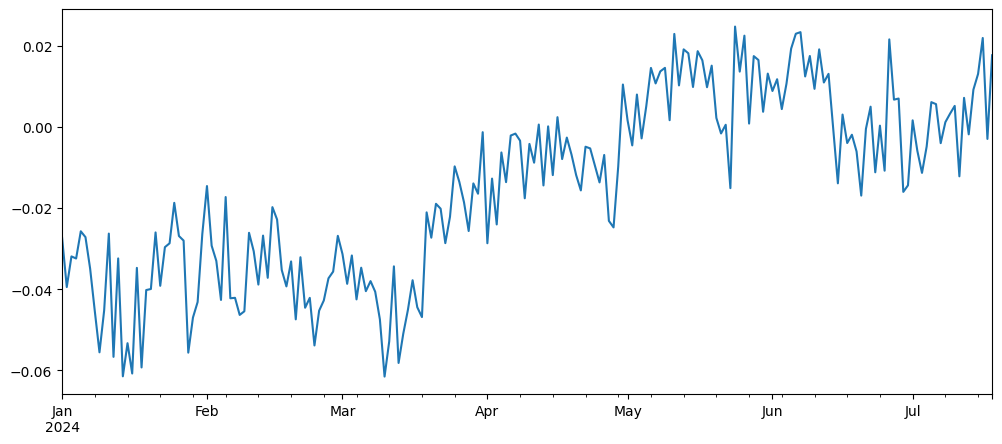

In [2]:
df = pd.read_csv('../../dados/AR_Exemplo.csv')
Y = pd.Series(df['preco_diff'])
Y.index = pd.date_range(start='2024-01-01', periods=200)
plt.rcParams["figure.figsize"] = [12, 5]
Y.plot()
plt.show()

### Ajuste que fizemos na última aula:
$$ Y_t = \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \phi_3 Y_{t-3} + \epsilon_t $$

In [3]:
primeira_ordem = Y.diff().dropna()
model1 = AutoReg(primeira_ordem, lags=3, trend='n').fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:             preco_diff   No. Observations:                  199
Model:                     AutoReg(3)   Log Likelihood                 624.540
Method:               Conditional MLE   S.D. of innovations              0.010
Date:                Fri, 02 May 2025   AIC                          -1241.080
Time:                        12:58:15   BIC                          -1227.968
Sample:                    01-05-2024   HQIC                         -1235.772
                         - 07-18-2024                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
preco_diff.L1    -0.5873      0.069     -8.572      0.000      -0.722      -0.453
preco_diff.L2    -0.2339      0.079     -2.964      0.003      -0.389      -0.079
preco_diff.L3    -0.2887      0.069     -4.179      0.000      -0.424      -0.153
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2982           -0.0000j            1.2982           -0.5000
AR.2            0.2440           -1.6150j            1.6333           -0.2261
AR.3            0.2440           +1.6150j            1.6333            0.2261
-----------------------------------------------------------------------------
"""

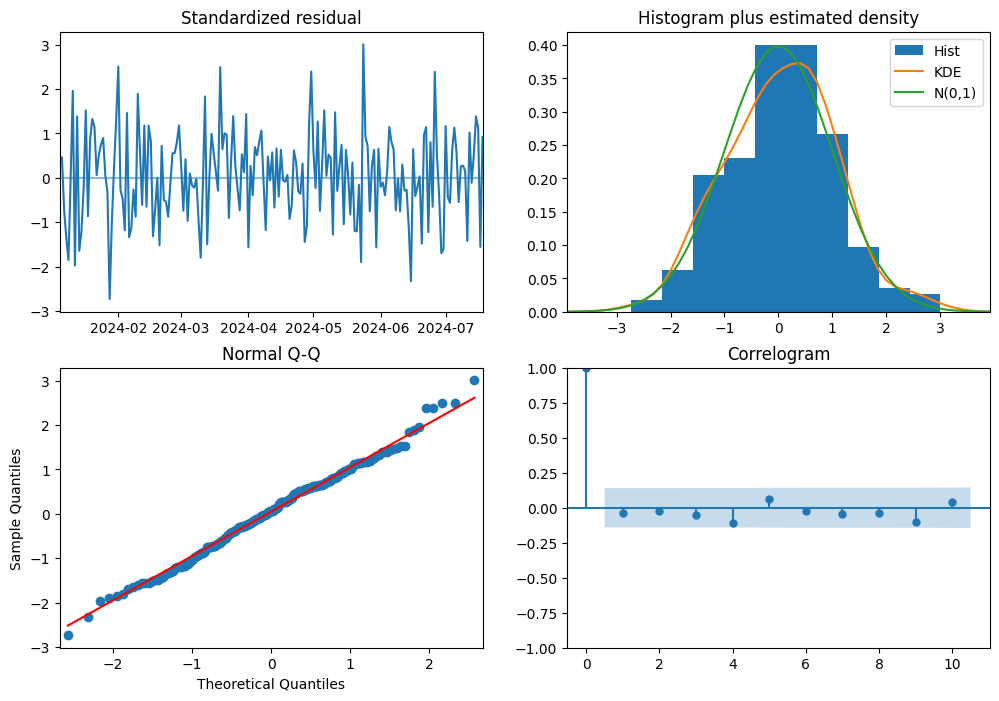

In [4]:
plt.rcParams["figure.figsize"] = [12, 8]
model1.plot_diagnostics()
plt.show()

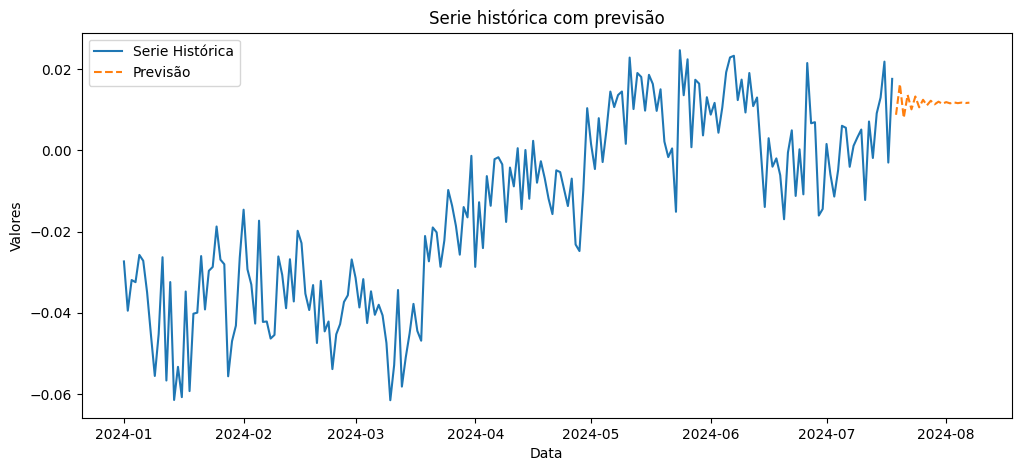

In [5]:
previsao = Y.iloc[-1] + model1.forecast(20).cumsum()
plot_forecast(Y,previsao)

Os próximos exemplos são longe do ideal, eu estou apenas mostrando algumas opções que não exploramos do AutoReg. Por exemplo, adicionar constante no modelo (phi 0):
$$ Y_t = \phi_0 + \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \phi_3 Y_{t-3} + \epsilon_t $$

                            AutoReg Model Results                             
Dep. Variable:             preco_diff   No. Observations:                  199
Model:                     AutoReg(3)   Log Likelihood                 624.762
Method:               Conditional MLE   S.D. of innovations              0.010
Date:                Fri, 02 May 2025   AIC                          -1239.525
Time:                        12:58:15   BIC                          -1223.134
Sample:                    01-05-2024   HQIC                         -1232.889
                         - 07-18-2024                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0005      0.001      0.667      0.505      -0.001       0.002
preco_diff.L1    -0.5888      0.068     -8.599      0.000      -0.723      -0.455
preco_diff.L2    -0.2366      0.079     

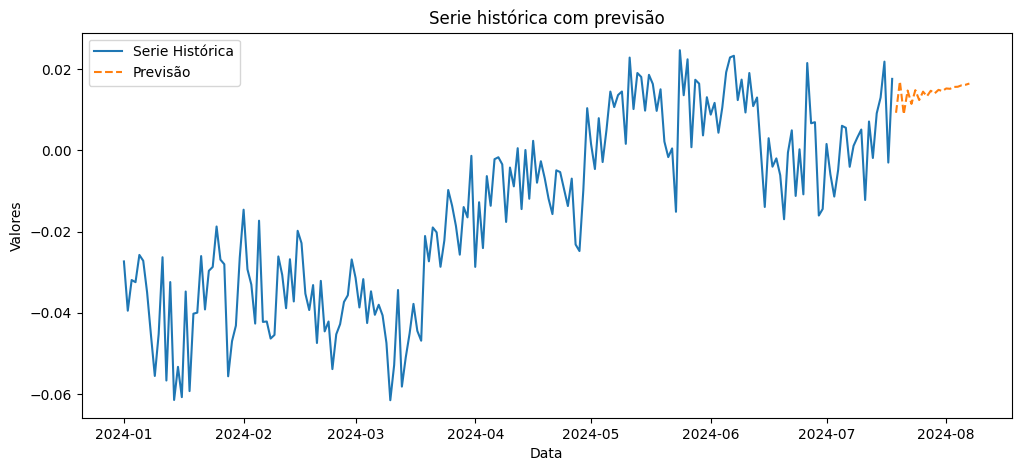

In [6]:
model2 = AutoReg(primeira_ordem, lags=3, trend='c').fit()
print(model2.summary())
previsao = Y.iloc[-1] + model2.forecast(20).cumsum()
plot_forecast(Y,previsao)

Ao invés de usar a série diferenciada, algumas pessoas podem querer adicionar uma tendência determinística na fórmula:
$$ 
Y_t = \phi_0 + \beta t + \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \phi_3 Y_{t-3} + \epsilon_t 
$$

                            AutoReg Model Results                             
Dep. Variable:             preco_diff   No. Observations:                  200
Model:                     AutoReg(3)   Log Likelihood                 627.724
Method:               Conditional MLE   S.D. of innovations              0.010
Date:                Fri, 02 May 2025   AIC                          -1243.448
Time:                        12:58:15   BIC                          -1223.749
Sample:                    01-04-2024   HQIC                         -1235.473
                         - 07-18-2024                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0115      0.003     -3.536      0.000      -0.018      -0.005
trend          7.901e-05   2.29e-05      3.449      0.001    3.41e-05       0.000
preco_diff.L1     0.3514      0.071     

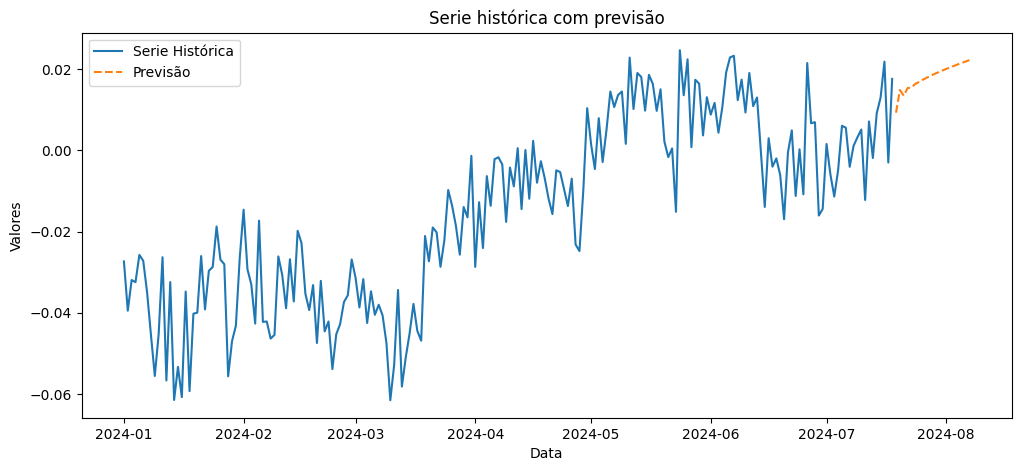

In [7]:
model3 = AutoReg(Y, lags=3, trend='ct').fit()
print(model3.summary())
previsao = model3.forecast(20)
plot_forecast(Y,previsao)

O mesmo modelo pode ser ajustado usando um ARIMA:

                               SARIMAX Results                                
Dep. Variable:             preco_diff   No. Observations:                  199
Model:                 ARIMA(3, 0, 0)   Log Likelihood                 634.775
Date:                Fri, 02 May 2025   AIC                          -1261.551
Time:                        12:58:15   BIC                          -1248.378
Sample:                    01-02-2024   HQIC                         -1256.219
                         - 07-18-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5873      0.063     -9.366      0.000      -0.710      -0.464
ar.L2         -0.2339      0.085     -2.756      0.006      -0.400      -0.068
ar.L3         -0.2887      0.066     -4.353      0.0

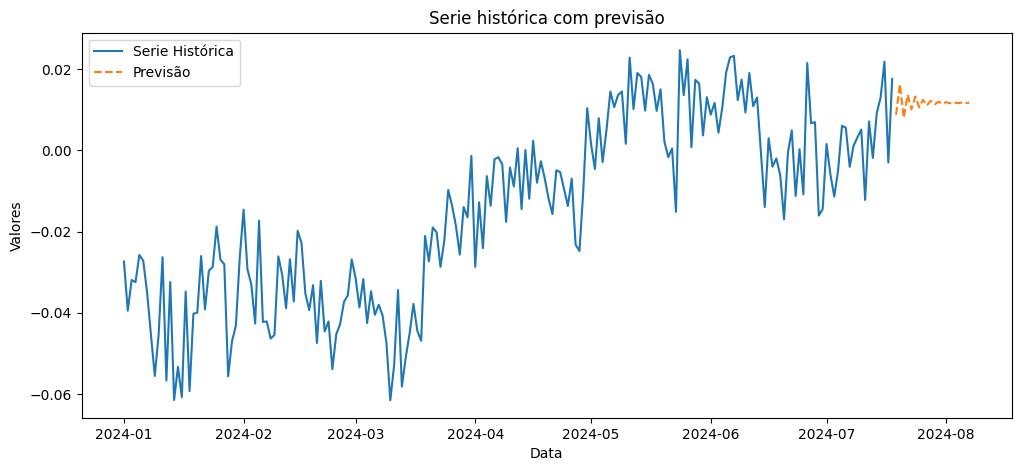

In [8]:
from statsmodels.tsa.arima.model import ARIMA
model4 = ARIMA(primeira_ordem, order=(3, 0, 0), trend='n').fit()
print(model4.summary())
previsao = Y.iloc[-1] + model4.forecast(20).cumsum()
plot_forecast(Y,previsao)

## MA

$$ \large Y_t = \mu + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \dots + \theta_q \epsilon_{t-q} + \epsilon_t $$


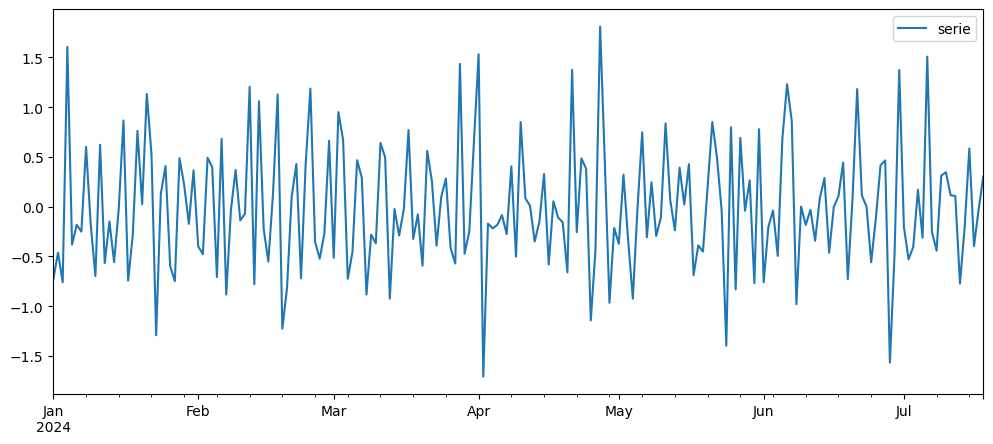

In [9]:
Y = pd.read_csv('../../dados/MA_Exemplo.csv')
Y.index = pd.date_range(start='2024-01-01', periods=200)
Y.plot()
plt.show()

In [10]:
teste_estacionariedade(Y)

/var/folders/f1/tdh3lyp114g78tg5wv2t7g3m0000gn/T/ipykernel_66950/2617936471.py:28: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kps = kpss(s)


('Estacionário', 'Estacionário')

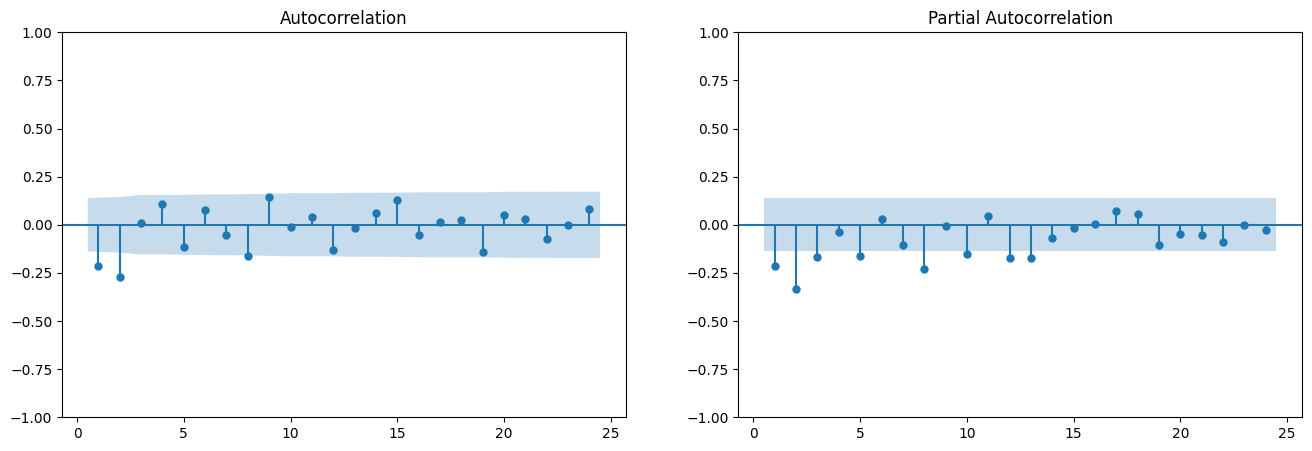

In [11]:
all_ac(Y)

                               SARIMAX Results                                
Dep. Variable:                  serie   No. Observations:                  200
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -161.535
Date:                Fri, 02 May 2025   AIC                            329.070
Time:                        12:58:16   BIC                            338.965
Sample:                    01-01-2024   HQIC                           333.075
                         - 07-18-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5189      0.065     -7.935      0.000      -0.647      -0.391
ma.L2         -0.4116      0.065     -6.323      0.000      -0.539      -0.284
sigma2         0.2917      0.032      9.040      0.0

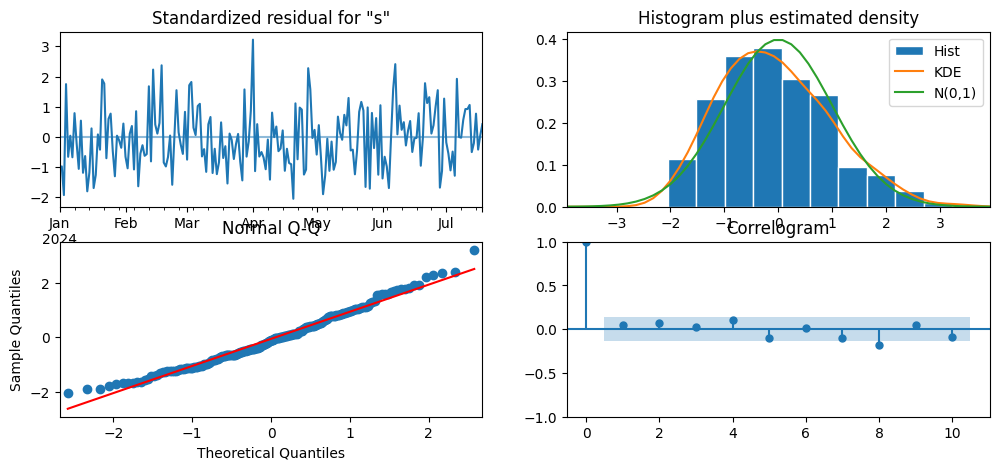

In [12]:
model = ARIMA(Y, order=(0, 0, 2), trend='n').fit()
print(model.summary())
model.plot_diagnostics()
plt.show()

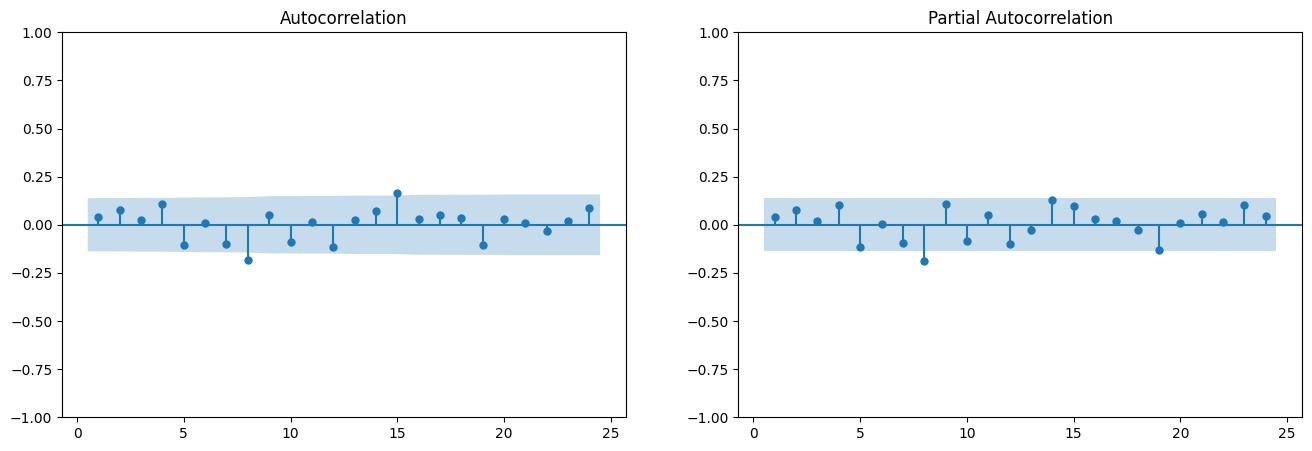

In [13]:
all_ac(model.resid)

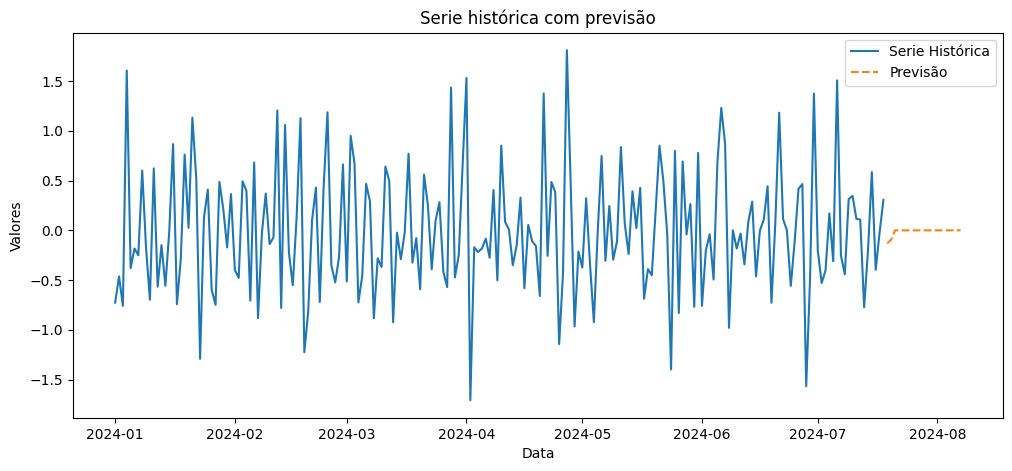

In [14]:
previsao = model.forecast(20)
plot_forecast(Y,previsao)

## ARMA
$$ \large Y_t =  \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \dots + \phi_p Y_{t-p} + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \dots + \theta_q \epsilon_{t-q} + \epsilon_t $$

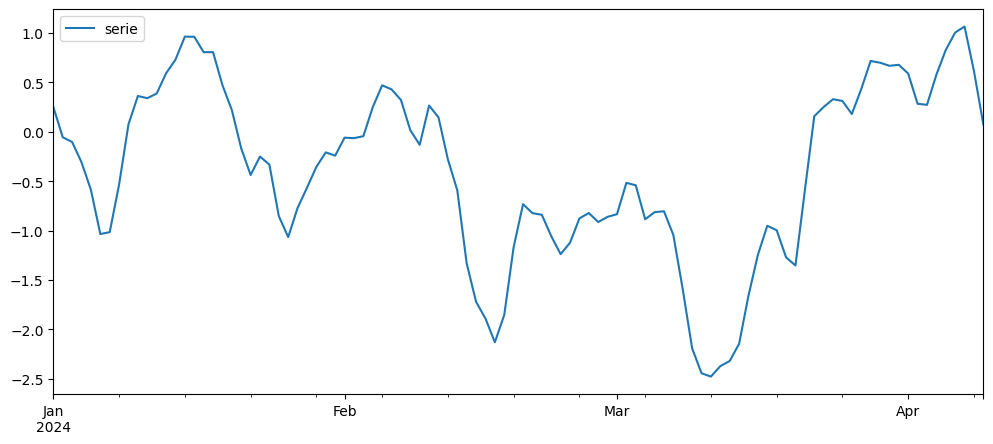

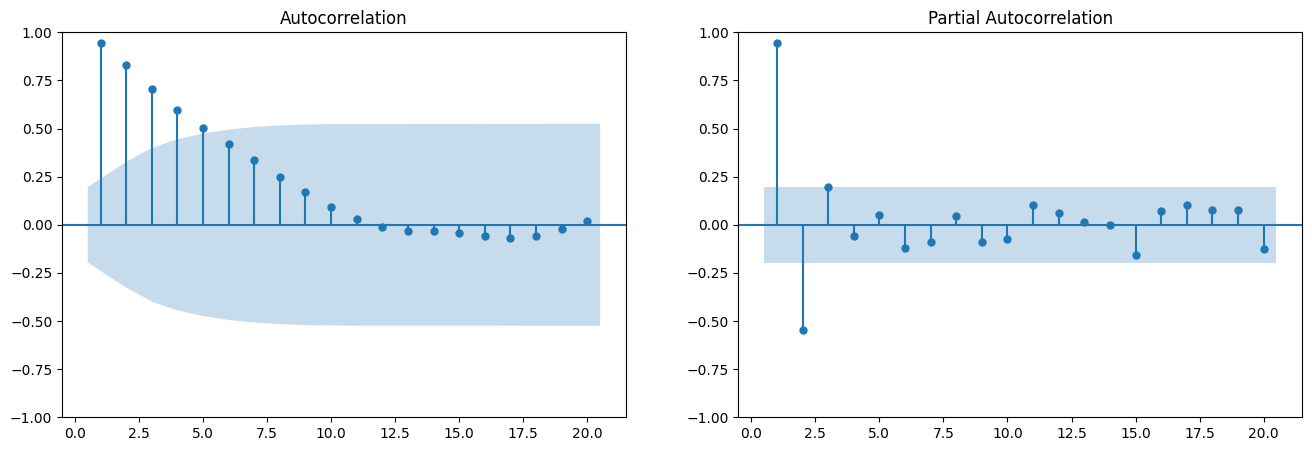

In [15]:
Y = pd.read_csv('../../dados/ARMA_Exemplo.csv')
Y.index = pd.date_range(start='2024-01-01', periods=100)
Y.plot()
all_ac(Y)

In [16]:
teste_estacionariedade(Y)

/var/folders/f1/tdh3lyp114g78tg5wv2t7g3m0000gn/T/ipykernel_66950/2617936471.py:28: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kps = kpss(s)


('Estacionário', 'Não Estacionário')

                               SARIMAX Results                                
Dep. Variable:                  serie   No. Observations:                  100
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -17.919
Date:                Fri, 02 May 2025   AIC                             39.838
Time:                        12:58:16   BIC                             45.048
Sample:                    01-01-2024   HQIC                            41.946
                         - 04-09-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9480      0.027     35.305      0.000       0.895       1.001
sigma2         0.0819      0.011      7.232      0.000       0.060       0.104
Ljung-Box (L1) (Q):                  30.64   Jarque-

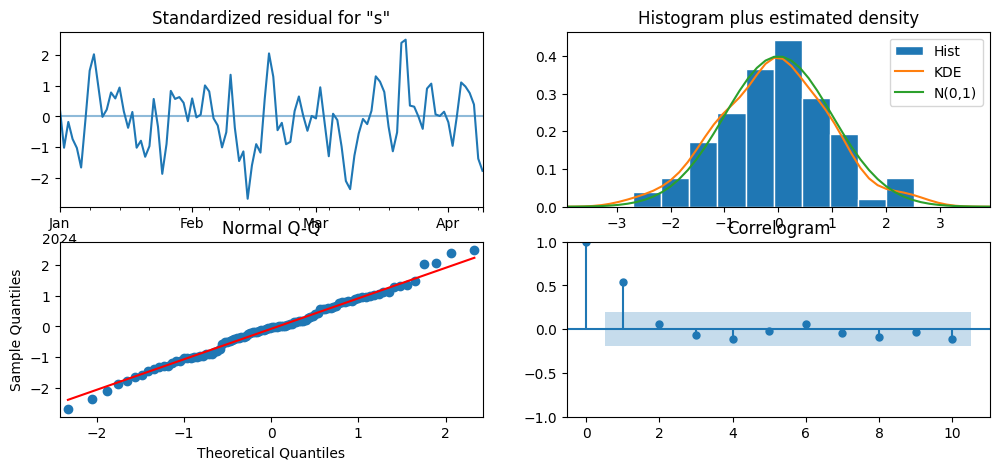

In [17]:
model = ARIMA(Y, order=(1, 0, 0), trend='n').fit()
print(model.summary())
model.plot_diagnostics()
plt.show()

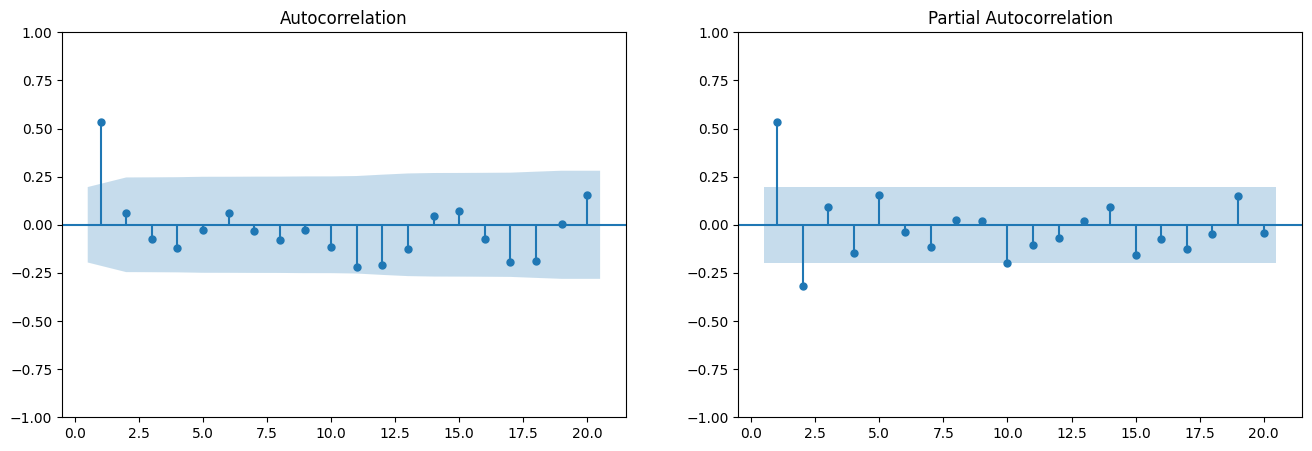

In [18]:
all_ac(model.resid)

                               SARIMAX Results                                
Dep. Variable:                  serie   No. Observations:                  100
Model:                 ARIMA(1, 0, 1)   Log Likelihood                  14.085
Date:                Fri, 02 May 2025   AIC                            -22.170
Time:                        12:58:17   BIC                            -14.354
Sample:                    01-01-2024   HQIC                           -19.007
                         - 04-09-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9092      0.040     22.963      0.000       0.832       0.987
ma.L1          0.9441      0.052     18.325      0.000       0.843       1.045
sigma2         0.0419      0.005      8.342      0.0

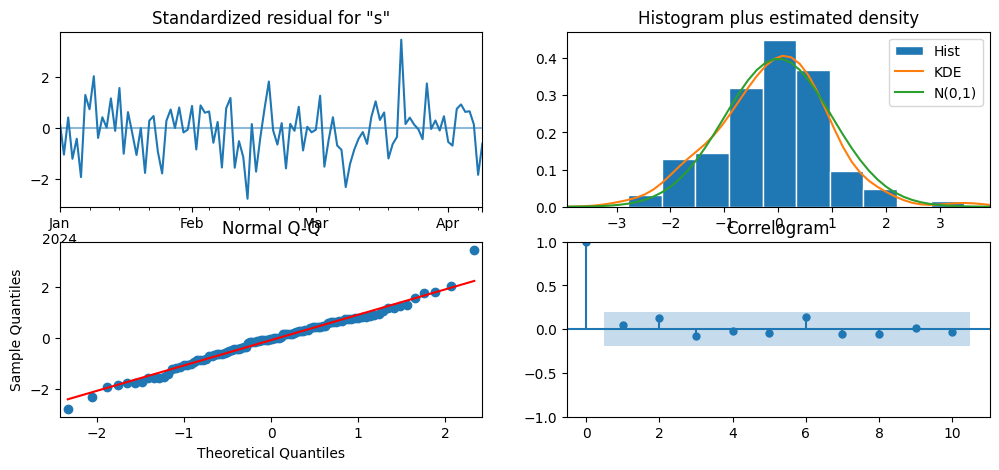

In [19]:
model1 = ARIMA(Y, order=(1, 0, 1), trend='n').fit()
print(model1.summary())
model1.plot_diagnostics()
plt.show()

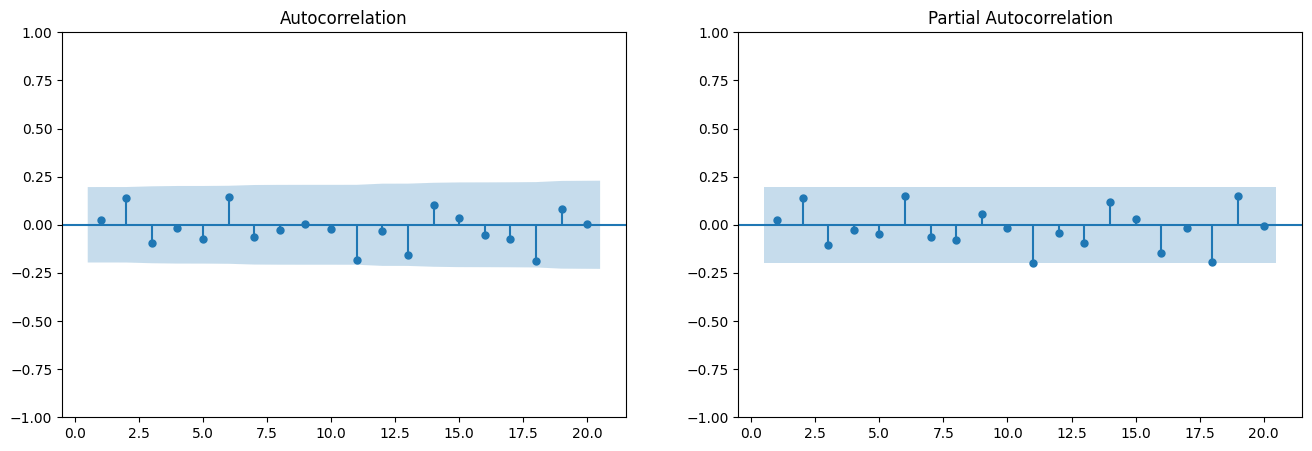

In [20]:
all_ac(model1.resid)

                               SARIMAX Results                                
Dep. Variable:                  serie   No. Observations:                  100
Model:                 ARIMA(2, 0, 0)   Log Likelihood                   2.557
Date:                Fri, 02 May 2025   AIC                              0.886
Time:                        12:58:17   BIC                              8.702
Sample:                    01-01-2024   HQIC                             4.049
                         - 04-09-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5132      0.086     17.571      0.000       1.344       1.682
ar.L2         -0.5868      0.088     -6.645      0.000      -0.760      -0.414
sigma2         0.0539      0.008      7.073      0.0

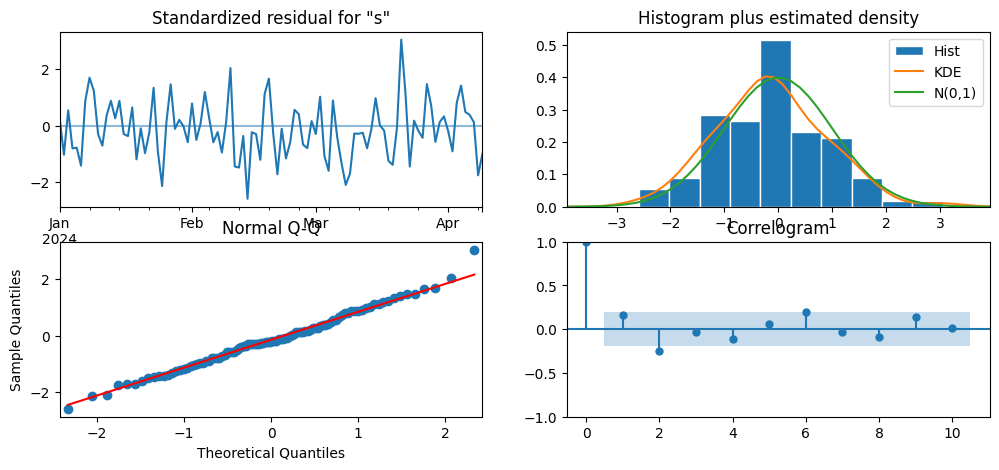

In [21]:
model2 = ARIMA(Y, order=(2, 0, 0), trend='n').fit()
print(model2.summary())
model2.plot_diagnostics()
plt.show()

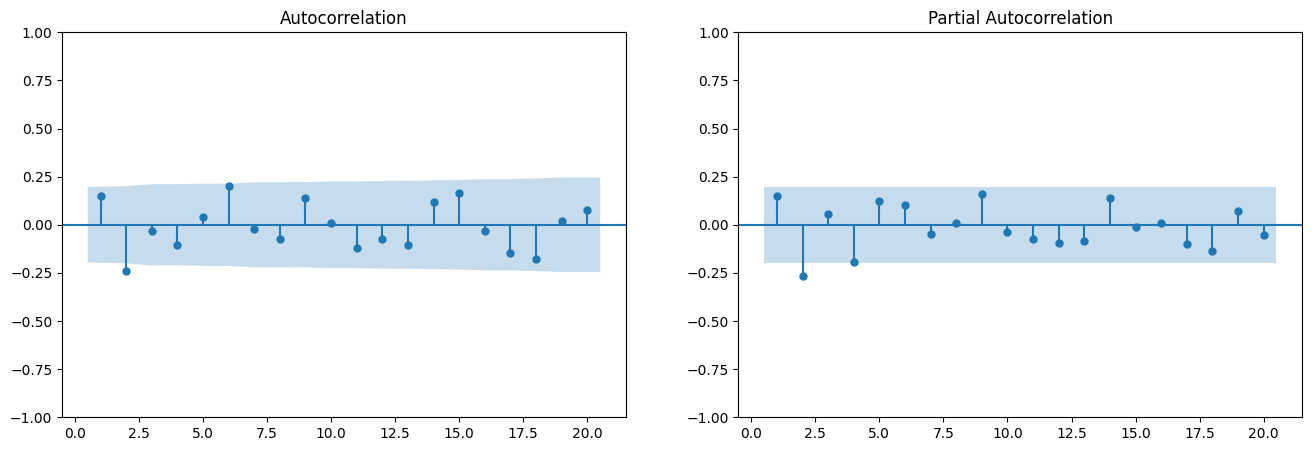

In [22]:
all_ac(model2.resid)

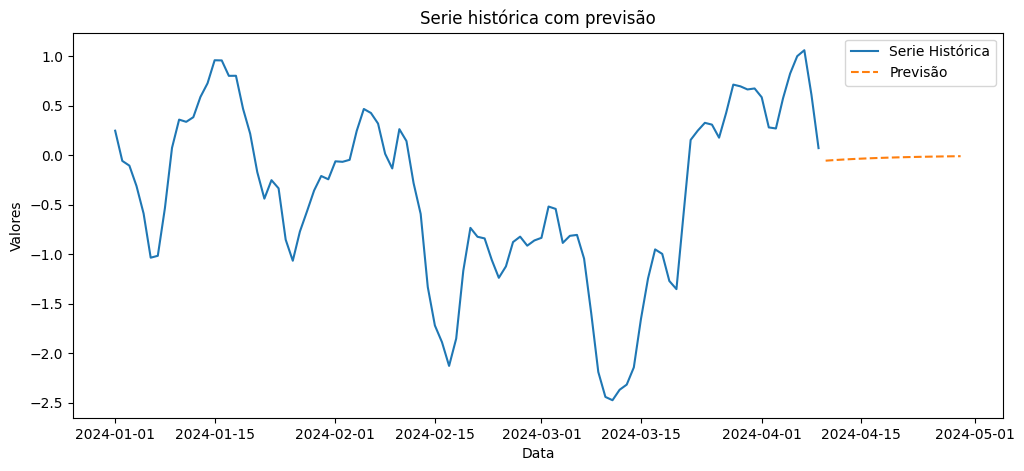

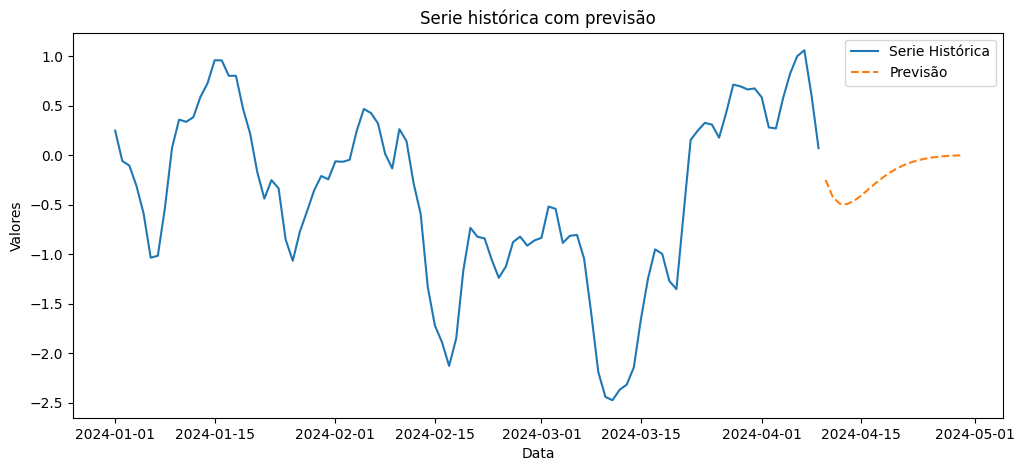

In [23]:
previsao1 = model1.forecast(20)
previsao2 = model2.forecast(20)
plot_forecast(Y,previsao1)
plot_forecast(Y,previsao2)

$$ \large B^2(Y_t) = B(Y_{t-1}) = Y_{t-2} $$

## I do ARIMA
### ARI
$$ \large  Y_t (1 - B)^d= \phi_0 + \phi_1 Y_{t-1} + \dots + \phi_p Y_{t-p} + \epsilon_t $$
$$ \large B(Y_t) = Y_{t-1} $$

### ARI(1,1)
$$ \large  Y_t (1 - B) = Y_t - Y_{t-1} = \phi_0 + \phi_1 Y_{t-1} + \epsilon_t $$


                               SARIMAX Results                                
Dep. Variable:             preco_diff   No. Observations:                  200
Model:                 ARIMA(3, 1, 0)   Log Likelihood                 634.775
Date:                Fri, 02 May 2025   AIC                          -1261.551
Time:                        12:58:18   BIC                          -1248.378
Sample:                    01-01-2024   HQIC                         -1256.219
                         - 07-18-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5873      0.063     -9.366      0.000      -0.710      -0.464
ar.L2         -0.2339      0.085     -2.756      0.006      -0.400      -0.068
ar.L3         -0.2887      0.066     -4.353      0.0

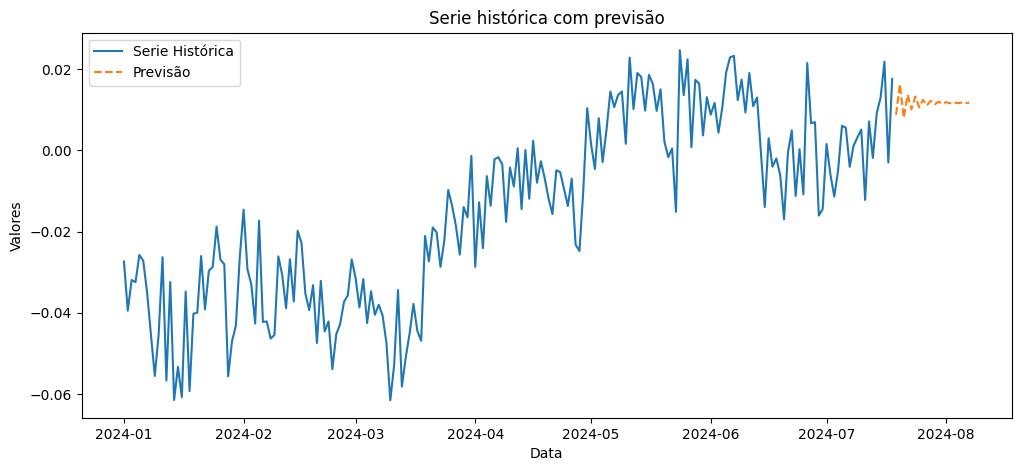

In [24]:
df = pd.read_csv('../../dados/AR_Exemplo.csv')
Y = pd.Series(df['preco_diff'])
Y.index = pd.date_range(start='2024-01-01', periods=200)
model5 = ARIMA(Y, order=(3, 1, 0)).fit()
print(model5.summary())
previsao = model5.forecast(20)
plot_forecast(Y,previsao)


### IMA
$$ \large (1 - B)^d Y_t = \mu + \theta_1 \epsilon_{t-1} + \dots + \theta_q \epsilon_{t-q} + \epsilon_t$$

$$ \large Y_t(1 - B) = \mu + \theta_1 \epsilon_{t-1} + \epsilon_t$$

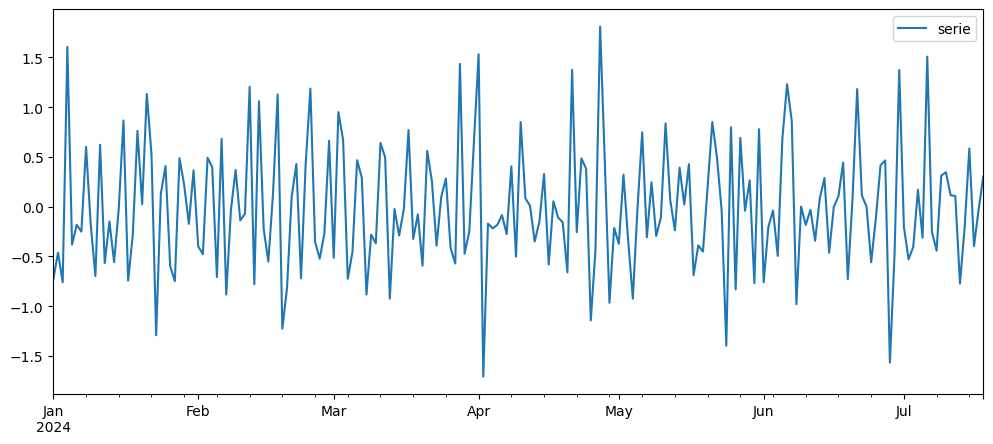

In [25]:
Y = pd.read_csv('../../dados/MA_Exemplo.csv')
Y.index = pd.date_range(start='2024-01-01', periods=200)
Y.plot()
plt.show()

In [26]:
teste_estacionariedade(Y)

/var/folders/f1/tdh3lyp114g78tg5wv2t7g3m0000gn/T/ipykernel_66950/2617936471.py:28: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kps = kpss(s)


('Estacionário', 'Estacionário')



### ARIMA
$$ \large (1 - B)^d Y_t = c + \phi_1 Y_{t-1} + \dots + \phi_p Y_{t-p} + \epsilon_t + \theta_1 \epsilon_{t-1} + \dots + \theta_q \epsilon_{t-q} $$

## Ajustando ARIMA

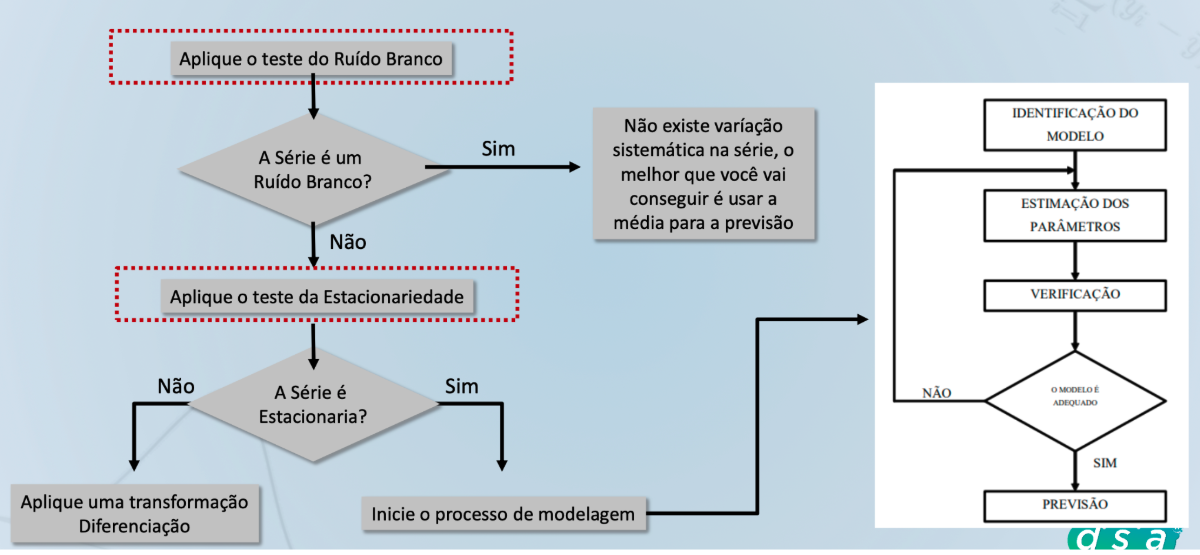

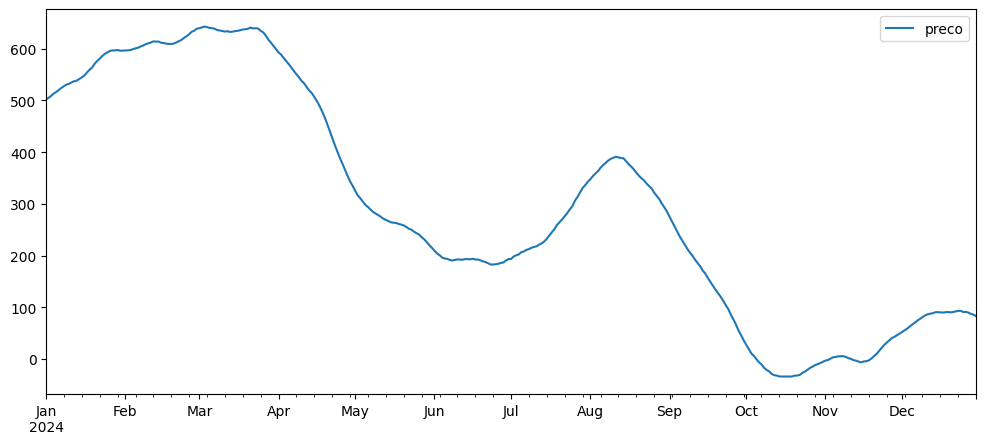

In [27]:
Y = pd.read_csv('../../dados/ARIMA_Exemplo.csv')
Y.index = pd.date_range(start='2024-01-01', periods = 365)
Y.plot()
plt.show()

In [28]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(Y)

,lb_stat,lb_pvalue
1,366.026711,1.371876e-81
2,730.725826,2.113017e-159
3,1093.728311,8.350381e-237
4,1454.675406,0.000000e+00
5,1813.227157,0.000000e+00
6,2169.033187,0.000000e+00
7,2521.784429,0.000000e+00
8,2871.171899,0.000000e+00
9,3216.890145,0.000000e+00
10,3558.662877,0.000000e+00


In [29]:
teste_estacionariedade(Y)

/var/folders/f1/tdh3lyp114g78tg5wv2t7g3m0000gn/T/ipykernel_66950/2617936471.py:28: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kps = kpss(s)


('Não Estacionário', 'Não Estacionário')

In [30]:
primeira_ordem = Y.diff().dropna()
teste_estacionariedade(primeira_ordem)

/var/folders/f1/tdh3lyp114g78tg5wv2t7g3m0000gn/T/ipykernel_66950/2617936471.py:28: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kps = kpss(s)


('Estacionário', 'Estacionário')

<Axes: >

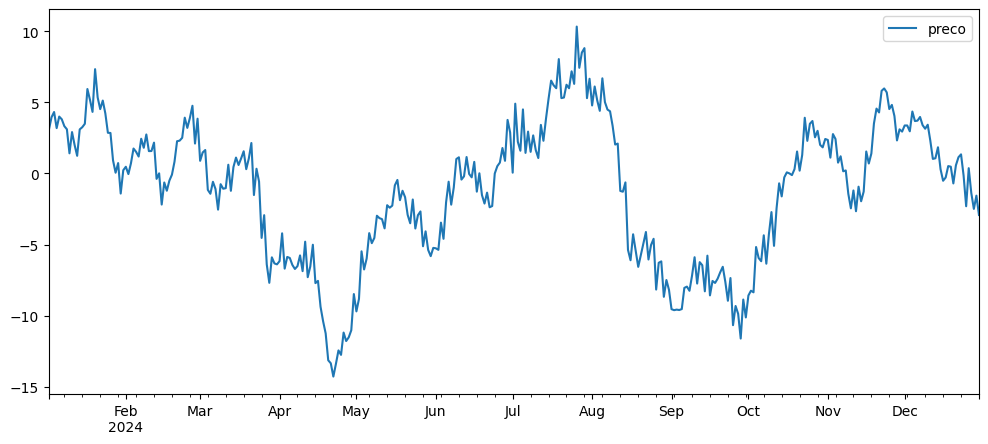

In [31]:
primeira_ordem.plot()

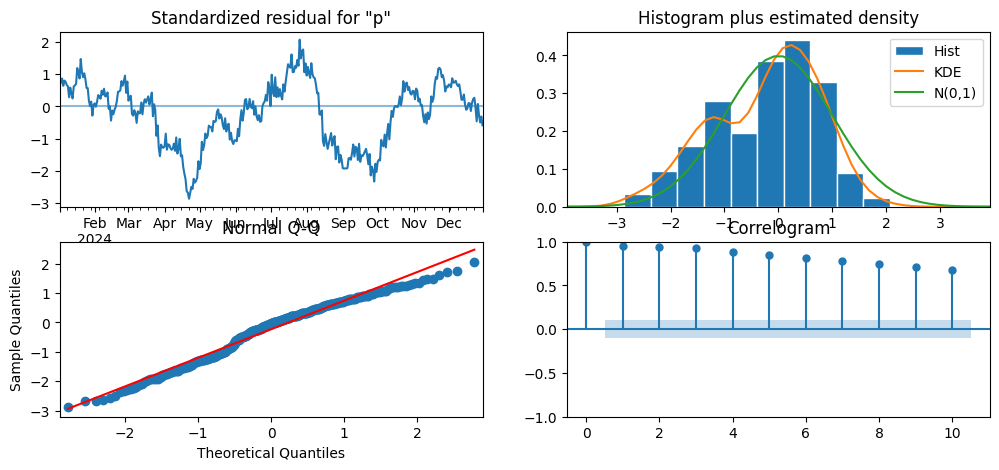

In [32]:
model = ARIMA(Y, order=(0,1,0)).fit()
model.plot_diagnostics()
plt.show()

In [33]:
residuo = model.resid[1:]
teste_estacionariedade(residuo)

/var/folders/f1/tdh3lyp114g78tg5wv2t7g3m0000gn/T/ipykernel_66950/2617936471.py:28: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kps = kpss(s)


('Estacionário', 'Estacionário')

In [34]:
def diagnostico(order):
    model= ARIMA(Y, order=order).fit()
    print(model.summary())
    model.plot_diagnostics()
    plt.show()
    residuo = model.resid
    residuo = residuo[1:] 
    all_ac(residuo)
    plt.show()

If you want to see the best BIC you can do a loop:

In [35]:
model = ARIMA(Y,order=(2,1,3)).fit()

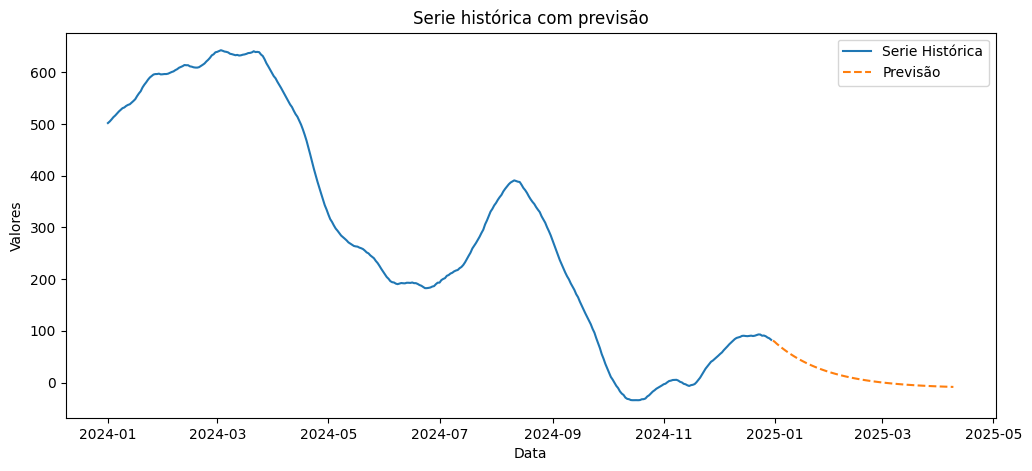

In [36]:
previsao = model.forecast(100)
plot_forecast(Y,previsao)

In [37]:
for p in range(1,5):
   for q in range(1,5):
      model= ARIMA(Y, order=(p,1,q)).fit()
      print(f'ARIMA({p},1,{q}) BIC = {model.bic}') 

ARIMA(1,1,1) BIC = 1266.983821230181
ARIMA(1,1,2) BIC = 1153.7536117840689
ARIMA(1,1,3) BIC = 1100.9377223877611
ARIMA(1,1,4) BIC = 1077.6642068575636
ARIMA(2,1,1) BIC = 1263.018179351325
ARIMA(2,1,2) BIC = 1125.2454805611467
ARIMA(2,1,3) BIC = 1064.5609816118654


/Users/danielferreira/miniconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2,1,4) BIC = 1069.8524835087137
ARIMA(3,1,1) BIC = 1199.2886051602168
ARIMA(3,1,2) BIC = 1121.165954774449
ARIMA(3,1,3) BIC = 1069.6984713979607
ARIMA(3,1,4) BIC = 1075.6572015989063


/Users/danielferreira/miniconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4,1,1) BIC = 1166.129682588044
ARIMA(4,1,2) BIC = 1119.3131193189504
ARIMA(4,1,3) BIC = 1074.9929574626171
ARIMA(4,1,4) BIC = 1080.6378305829544


/Users/danielferreira/miniconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Modelando clicks

In [38]:
df = pd.read_csv('../../dados/clicks_original.csv')
Y = df['clicks']

<Axes: >

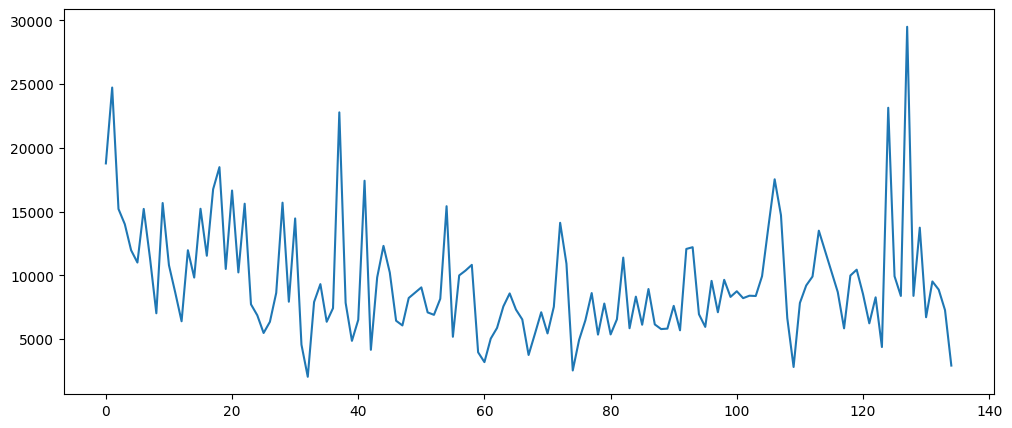

In [39]:
Y.plot()

<Axes: >

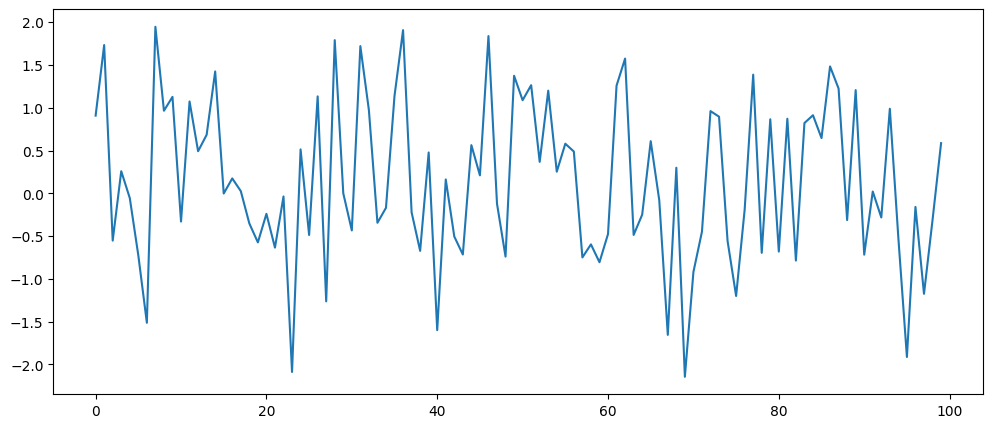

In [40]:
Z = np.random.normal(size=100)
Z = pd.Series(Z)
Z.plot()

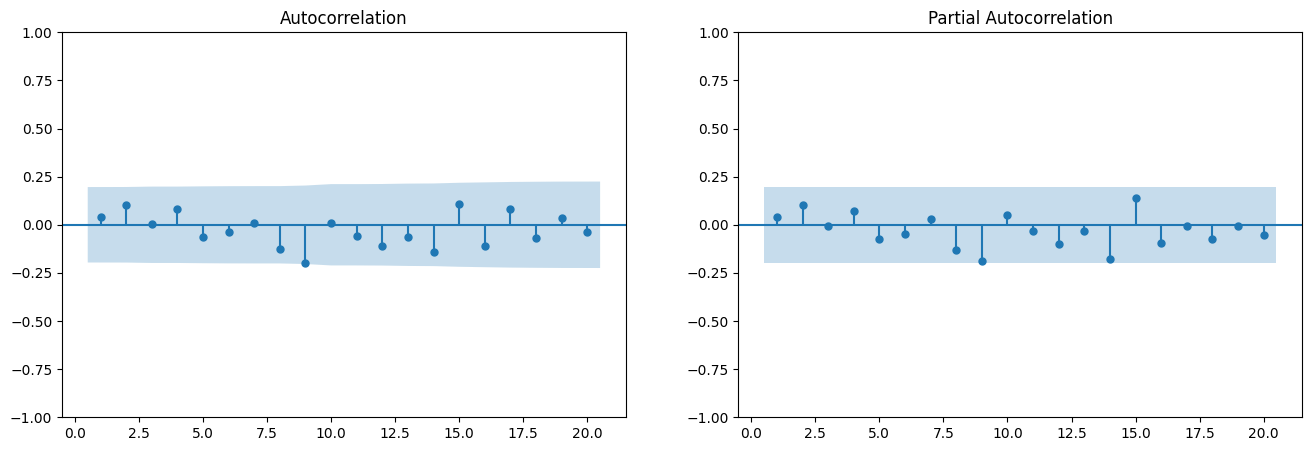

In [41]:
all_ac(Z)

In [42]:
acorr_ljungbox(Y)

,lb_stat,lb_pvalue
1,6.520892,0.010661
2,9.515950,0.008583
3,12.692946,0.005350
4,13.966111,0.007404
5,14.013846,0.015522
6,14.186384,0.027622
7,15.664775,0.028362
8,18.967663,0.015034
9,20.732879,0.013891
10,20.734025,0.023026


In [43]:
teste_estacionariedade(Y)

('Não Estacionário', 'Estacionário')

In [44]:
primeira_ordem = Y.diff().dropna()
teste_estacionariedade(primeira_ordem)

('Não Estacionário', 'Estacionário')

<Axes: >

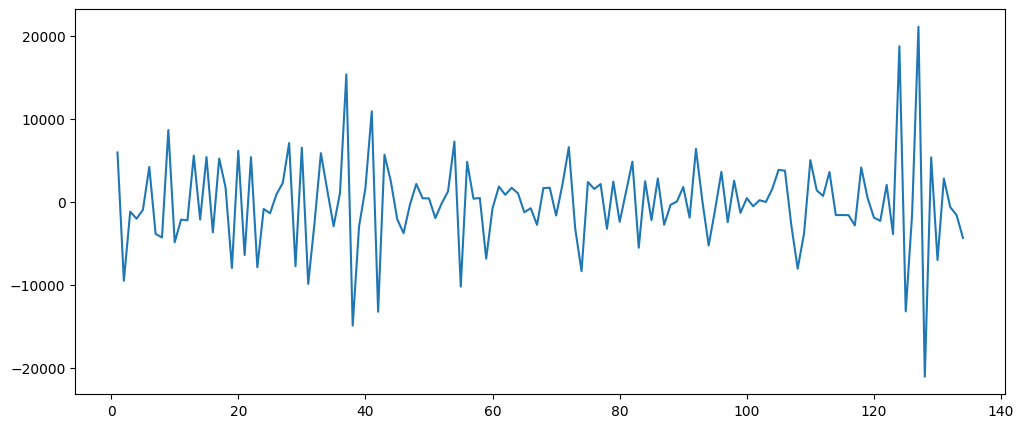

In [45]:
primeira_ordem.plot()

In [46]:
segunda_ordem = Y.diff().diff().dropna()
teste_estacionariedade(segunda_ordem)

/var/folders/f1/tdh3lyp114g78tg5wv2t7g3m0000gn/T/ipykernel_66950/2617936471.py:28: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kps = kpss(s)


('Estacionário', 'Estacionário')

                               SARIMAX Results                                
Dep. Variable:                 clicks   No. Observations:                  135
Model:                 ARIMA(1, 2, 1)   Log Likelihood               -1328.703
Date:                Fri, 02 May 2025   AIC                           2663.407
Time:                        12:58:20   BIC                           2672.078
Sample:                             0   HQIC                          2666.931
                                - 135                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4003      0.057     -6.995      0.000      -0.512      -0.288
ma.L1         -1.0000      0.081    -12.332      0.000      -1.159      -0.841
sigma2      2.688e+07   3.02e-09   8.91e+15      0.0

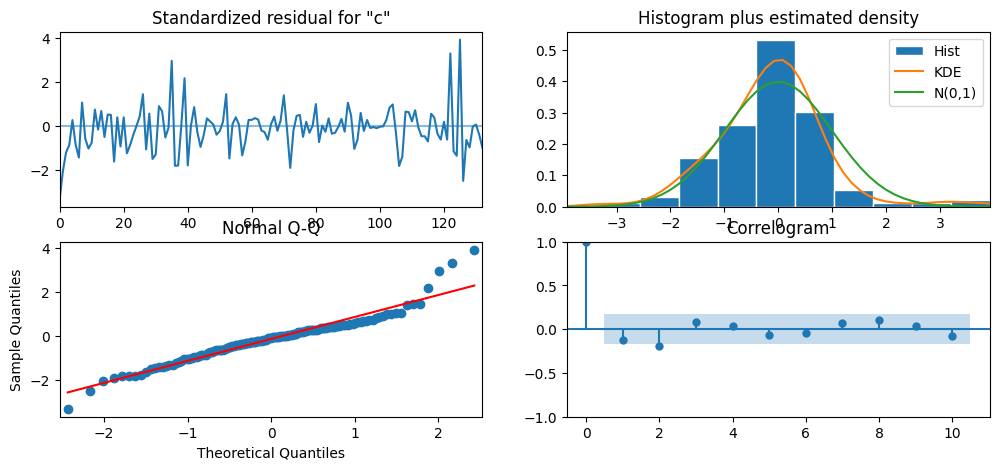

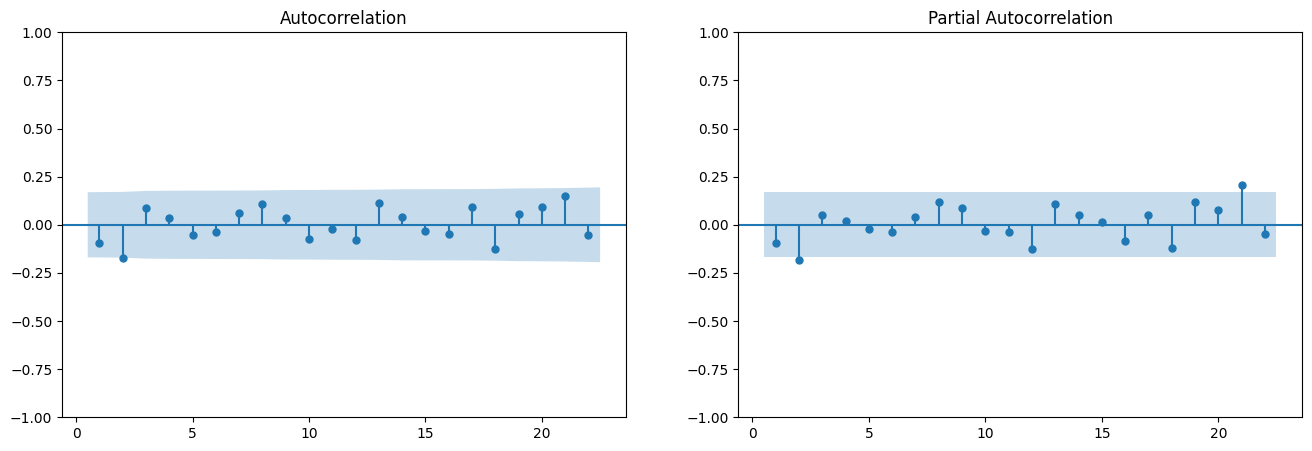

In [47]:
diagnostico((1,2,1))

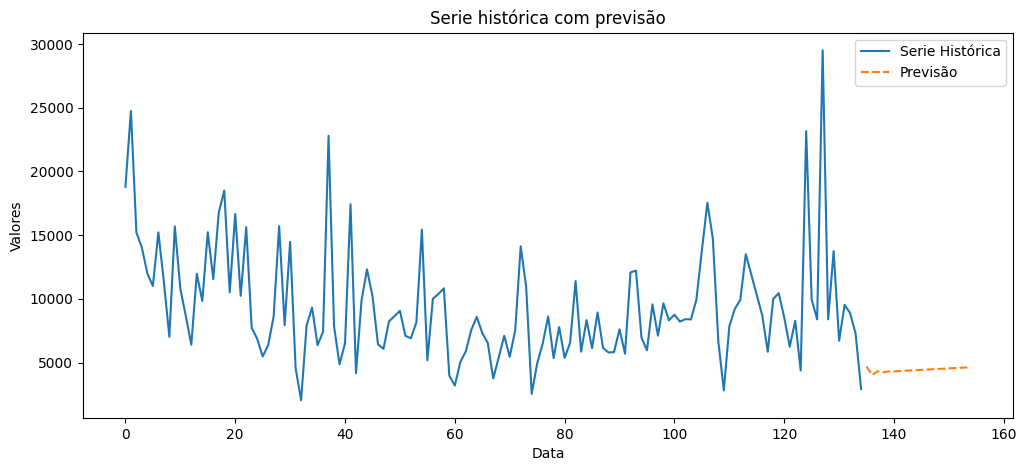

In [48]:
model = ARIMA(Y, order = (1,2,1)).fit()
previsao = model.forecast(20)
plot_forecast(Y,previsao)